In [0]:
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle as pkl
import math
import csv
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from collections import Counter

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
def get_dataframe(link,filename) :

  fluff, id = link.split('=')

  downloaded = drive.CreateFile({'id':id}) 

  downloaded.GetContentFile(filename)

  dataframe = pd.read_csv(filename)

  data_label_encoder = preprocessing.LabelEncoder()

  encoded_list = data_label_encoder.fit_transform(dataframe['Airport'])

  dataframe['EncodedAirport'] = encoded_list

  return dataframe

In [0]:
def get_model(link,filename) :

  fluff, id = link.split('=')

  downloaded = drive.CreateFile({'id':id}) 

  downloaded.GetContentFile(filename)

  f = open(filename,"rb")

  return pkl.load(f)

In [0]:
dataframe = get_dataframe('https://drive.google.com/open?id=17DbBIxtBcBM9Q4MWbeF46ml8WNv_ATKl','Flight_Weather.csv')

In [0]:
y = dataframe['ArrDel15']

y_regression = dataframe['ArrDelayMinutes']

dataframe = dataframe.drop(['ArrDel15','FlightDate','Date','Airport','ArrDelayMinutes'],axis = 1)

X = dataframe

In [0]:
X_train, X_test, y_train, y_test ,y_regression_train,y_regression_test= train_test_split(X, y,y_regression,test_size = 0.25)

In [0]:
gbc = get_model('https://drive.google.com/open?id=1jjJ7aXdwK98fA9dva9GgOH3QQLptDbXu','GBC_SMOTE.pkl')

gbr = get_model('https://drive.google.com/open?id=1tnNJYIKF2AVpdlXPxOQtMvhOEnOEhFzw','GBR.pkl')

In [0]:
gbc.fit(X_test,y_test)

y_pred = gbc.predict(X_test)

In [0]:
X_test['Predicted'] = y_pred

X_test['ArrDelayMinutes'] = y_regression_test

X_test = X_test[X_test['Predicted'] == 1]

In [0]:
y = X_test['ArrDelayMinutes']

X_test = X_test.drop(['Predicted','ArrDelayMinutes'],axis = 1)

X = X_test

In [0]:
y_regressor_pred = gbr.predict(X)

In [16]:
print("\n\n Gradient Boosting \n\n")

print(" Mean Absolute Error : ", metrics.mean_absolute_error(y, y_regressor_pred))  

print(" Mean Squared Error : ", metrics.mean_squared_error(y, y_regressor_pred))  

print(" Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y, y_regressor_pred)))

print(" R2 Score : ",metrics.r2_score(y,y_regressor_pred))



 Gradient Boosting 


 Mean Absolute Error :  12.728170602568344
 Mean Squared Error :  311.3335703366802
 Root Mean Squared Error :  17.644647073168684
 R2 Score :  0.9495539988394737


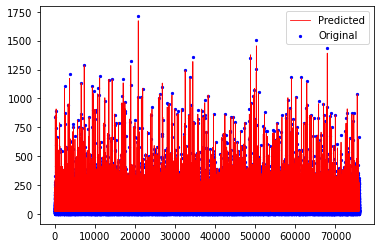

In [17]:
x_ax = range(len(y))

plt.scatter(x_ax, y, s=5, color="blue", label = "Original")

plt.plot(x_ax, y_regressor_pred, lw=0.8, color="red", label = "Predicted")

plt.legend()

plt.show()